In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from plot_region import *

In [64]:
X,y = make_moons(n_samples=200, noise=0.3, random_state=0)

In [65]:
param_range = np.arange(0.1, 200, 1)

In [66]:
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv=2)

In [67]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

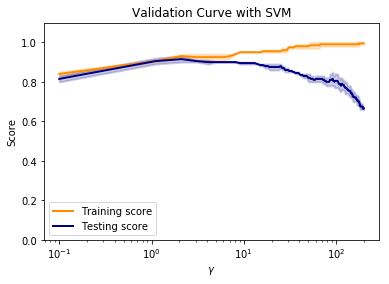

In [68]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="lower left")
plt.show()

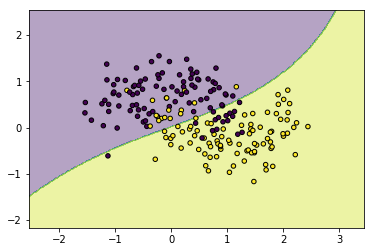

In [70]:
clr5 = SVC(kernel='rbf', gamma=0.1)
clr5.fit(X, y)
PlotResultRegion(clr5, X, y, h = 0.02)